## K-Fold Cross Validation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='Species'>

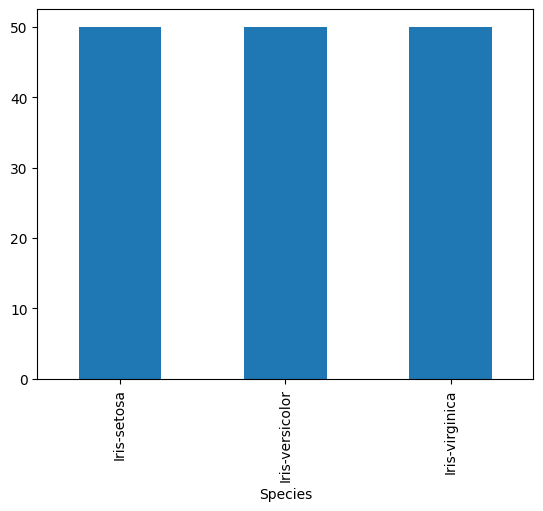

In [3]:
df['Species'].value_counts().plot.bar()

In [4]:
df.drop('Id',axis=1,inplace=True)

In [5]:
# Let's Split the data
X=df.drop('Species',axis=1)
y=df['Species']

In [8]:
X.shape

(150, 4)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=4) #n_neighbors is k value that the user has to give

In [17]:
from sklearn.model_selection import cross_val_score,KFold
cross_val_score(knn_model,X,y,cv=10,scoring="accuracy")# cv is the K value is the number of samples in the K-Fold Cross Validation

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.93333333, 1.        , 1.        , 1.        ])

In [18]:
cross_val_score(knn_model,X,y,cv=10,scoring="accuracy").mean()

np.float64(0.9666666666666666)

In [19]:
num_folds=5
kf=KFold(n_splits=num_folds,shuffle=True,random_state=42)

In [21]:
cross_val_score(knn_model,X,y,cv=kf,scoring="accuracy")

array([1.        , 0.96666667, 1.        , 0.93333333, 0.96666667])

In [22]:
cross_val_score(knn_model,X,y,cv=kf,scoring="accuracy").mean()

np.float64(0.9733333333333334)

## GridSearch Cross Validation Technique

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
knn_model_gs=KNeighborsClassifier()

In [26]:
#the numbers that n_neighbors that user wants to work with
params={'n_neighbors':[4,5,6,7,8,9,10]}

In [33]:
grid_knn=GridSearchCV(estimator=knn_model_gs,param_grid=params,cv=5,scoring="accuracy")

In [34]:
from sklearn.model_selection import train_test_split
### Let's split data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [35]:
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [36]:
print(grid_knn.best_params_)

{'n_neighbors': 4}


In [37]:
y_pred_gs=grid_knn.predict(X_test)